In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ConfigParser import ConfigParser
import pandas as pd
%matplotlib inline

In [2]:
cfg = ConfigParser()
cfg.read("../config.ini")
accidents_dir = cfg.get("dirs", "accidentes")
grid_id = cfg.get("grid", "default")
print "using", grid_id

using m250


### load file

In [3]:
acc = pd.read_csv("%s/%s_c.csv"%(accidents_dir, grid_id))
acc.head()

,id,xmin,xmax,ymin,ymax,geometry,All,Atropello,Caida Ocupante,Choque,...,MOTOCARRO,MOTOCICLETA,MOTOCICLO,REMOLQUE,TRACCION ANIMAL,TRACTO-CAMION REMOLQUE,TRACTOCAMION,TRACTOR,TRICICLO,VOLQUETA
0,24,833898.497295,834148.497295,1.189812e+06,1.190062e+06,"POLYGON ((833898.497295 1190061.7146, 834148.4...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,834148.497295,834398.497295,1.189812e+06,1.190062e+06,"POLYGON ((834148.497295 1190061.7146, 834398.4...",2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,834398.497295,834648.497295,1.189812e+06,1.190062e+06,"POLYGON ((834398.497295 1190061.7146, 834648.4...",1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,834648.497295,834898.497295,1.189812e+06,1.190062e+06,"POLYGON ((834648.497295 1190061.7146, 834898.4...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,834898.497295,835148.497295,1.189812e+06,1.190062e+06,"POLYGON ((834898.497295 1190061.7146, 835148.4...",6.0,0.0,0.0,6.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### inspect overall occurences

In [4]:
acc.sum()

id                                                                  2456110
xmin                                                            1.50619e+09
xmax                                                            1.50664e+09
ymin                                                            2.13624e+09
ymax                                                            2.13669e+09
geometry                  POLYGON ((833898.497295 1190061.7146, 834148.4...
All                                                                   72465
Atropello                                                              4138
Caida Ocupante                                                         3632
Choque                                                                58313
Incendio                                                                  4
Volcamiento                                                            1493
Otro                                                                   4889
ABONADORA   

### inspect some correlations

- observe **atropello** is quite uncorrelated to **choque** $\Rightarrow$ cells with many _atropellos_ might not have many _choques_ (and viceversa)
- MOTOCICLETAS are somewhat correlated to AUTOMOVILES, but less to CAMIONETAS and less to BUS

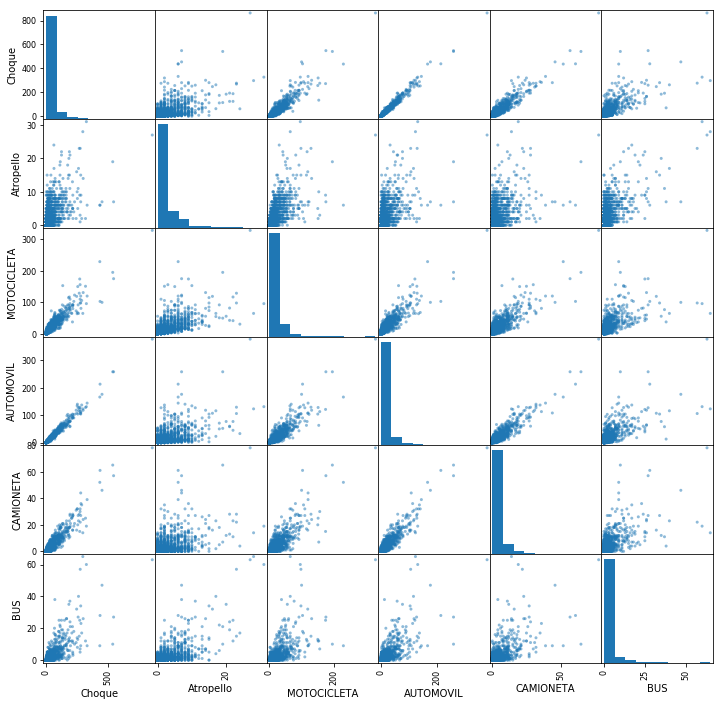

In [5]:
k = acc[["Choque", "Atropello", "MOTOCICLETA", "AUTOMOVIL", "CAMIONETA", "BUS"]]
pd.plotting.scatter_matrix(k, figsize=(12,12));

details on some pairs

Text(0,0.5,u'motocicleta')

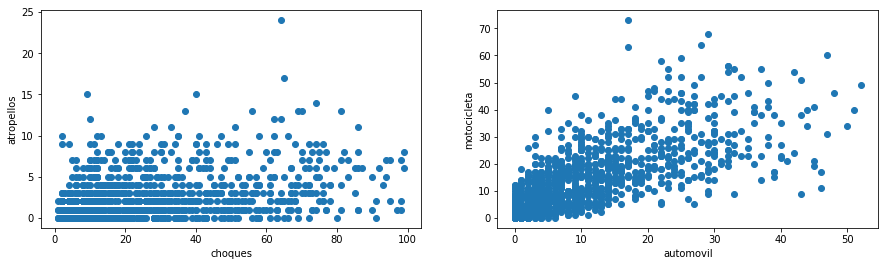

In [6]:
plt.figure(figsize=(15,4))
k = acc[(acc.Choque>0)&(acc.Choque<100)]
plt.subplot(121)
plt.scatter(k.Choque, k.Atropello)
plt.ylabel("atropellos")
plt.xlabel("choques")
plt.subplot(122)
plt.scatter(k.AUTOMOVIL, k.MOTOCICLETA)
plt.xlabel("automovil")
plt.ylabel("motocicleta")

### number of cells for each choque/atropello value count overall

In [7]:
def plot_counts(k, col):
    k = pd.DataFrame(k[col].value_counts()).sort_index()
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(121)
    k.loc[:100].plot(ax=ax,title=u"número de celdas con cantidad de choques")
    plt.xlabel(u"número de %ss"%col); plt.ylabel(u"número de celdas")
    plt.grid()
    if len(k.loc[100:])>0:
        ax = fig.add_subplot(122)
        plt.xlabel(u"número de %ss"%col); plt.ylabel(u"número de celdas")
        k.loc[100:].plot(ax=ax,title=u"número de celdas con cantidad de choques")
        plt.grid()

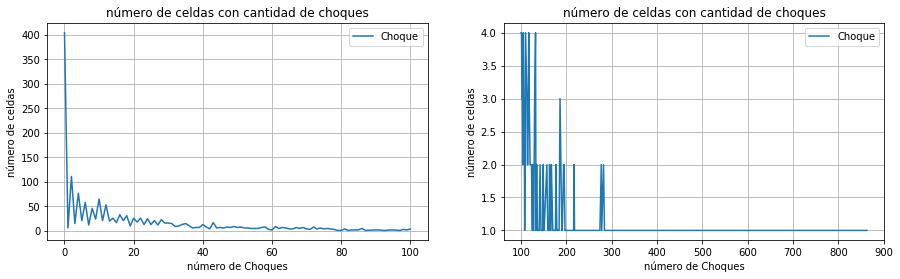

In [8]:
plot_counts(acc, "Choque")

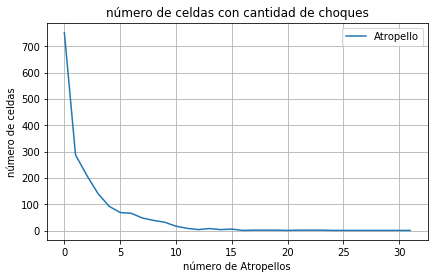

In [9]:
plot_counts(acc, "Atropello")

### number of cells for each choque value count

In [13]:
def get_percentiles(k, n_percentiles):
    quants = np.linspace(0,1,n_percentiles+1)*100
    percs = np.percentile(k, quants)
    return percs, quants

def show_percentiles(k, n_percentiles):
    percs, quants = get_percentiles(k, n_percentiles)
    print "   percentile  # occurrences    # cells " 
    for i in range(len(percs)-1):
        print "%2d"%(i+1), "%3d%s -%3d%s"%(quants[i],"%", quants[i+1], "%"), \
              "  %3d - %3d"%(percs[i], percs[i+1]-1), \
              "    %4d"%np.sum( (k>=percs[i]) & (k<percs[i+1]))
    return percs

In [14]:
print "using grid size %s"%grid_id
print "cells with no choques", np.sum(acc.Choque==0)

using grid size m250
cells with no choques 404


#### percentiles with more that zero choques


In [15]:
show_percentiles(acc.Choque[acc.Choque>0].values, 2)

   percentile  # occurrences    # cells 
 1   0% - 50%     1 -  20      693
 2  50% -100%    21 - 862      708


array([  1.,  21., 863.])

In [16]:
p=show_percentiles(acc.Choque[acc.Choque>0].values, 3)

   percentile  # occurrences    # cells 
 1   0% - 33%     1 -  11      456
 2  33% - 66%    12 -  34      467
 3  66% -100%    35 - 862      478


In [17]:
show_percentiles(acc.Choque[acc.Choque>0].values, 4)

   percentile  # occurrences    # cells 
 1   0% - 25%     1 -   8      346
 2  25% - 50%     9 -  20      347
 3  50% - 75%    21 -  48      352
 4  75% -100%    49 - 862      356


array([  1.,   9.,  21.,  49., 863.])

In [18]:
show_percentiles(acc.Choque[acc.Choque>0].values, 5)

   percentile  # occurrences    # cells 
 1   0% - 20%     1 -   5      230
 2  20% - 40%     6 -  14      325
 3  40% - 60%    15 -  27      266
 4  60% - 80%    28 -  60      295
 5  80% -100%    61 - 862      285


array([  1.,   6.,  15.,  28.,  61., 863.])

#### create labels 

In [19]:
p

array([  1.,  12.,  35., 863.])

In [20]:
def get_labels(acc, p):
    return pd.DataFrame([[i.id, np.argwhere(i.Choque<p)[0][0] if i.Choque<p[-1] else len(p)-1]  \
                           for _,i in acc.iterrows()], columns=["id", "label"])
labels = get_labels(acc,p)
labels.head()

,id,label
0,24,0
1,25,0
2,26,0
3,27,0
4,28,1


In [21]:
labels.label.value_counts()

3    479
2    467
1    456
0    404
Name: label, dtype: int64

## now create labels for all grid sizes

In [22]:
for grid_id in ["m250", "m350", "m500"]:
    acc = pd.read_csv("%s/%s_c.csv"%(accidents_dir, grid_id))
    print "grid_id %s"%grid_id, "number of cells with no accidentes", np.sum(acc.Choque==0)
    p = show_percentiles(acc.Choque[acc.Choque>0].values, 3)
    
    labels = get_labels(acc, p)
    
    fname = "../support_data/labels_4classes_%s.csv"%grid_id
    print "saved to", fname
    print
    labels.to_csv(fname, index=False)

grid_id m250 number of cells with no accidentes 404
   percentile  # occurrences    # cells 
 1   0% - 33%     1 -  11      456
 2  33% - 66%    12 -  34      467
 3  66% -100%    35 - 862      478
saved to ../support_data/labels_4classes_m250.csv

grid_id m350 number of cells with no accidentes 149
   percentile  # occurrences    # cells 
 1   0% - 33%     1 -  21      260
 2  33% - 66%    22 -  64      275
 3  66% -100%    65 - 857      269
saved to ../support_data/labels_4classes_m350.csv

grid_id m500 number of cells with no accidentes 45
   percentile  # occurrences    # cells 
 1   0% - 33%     1 -  42      143
 2  33% - 66%    43 - 127      148
 3  66% -100%   128 - 1303      145
saved to ../support_data/labels_4classes_m500.csv

